### Bias–Variance Tradeoff

Objective:
To empirically illustrate the bias–variance tradeoff using polynomial regression on synthetic data generated from a known nonlinear function.

###
We assume an unknown target function:
                            ***f(x)=sin(x)***

Observed data are generated as:
                            ***yi​=f(xi​)+εi​,             εi​∼N(0,σ2)***


With irreducible noise σ = 0.3

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

np.random.seed(42)

x = np.linspace(0, 10, 30)
y = np.sin(x) + np.random.normal(0, 0.3, 30)


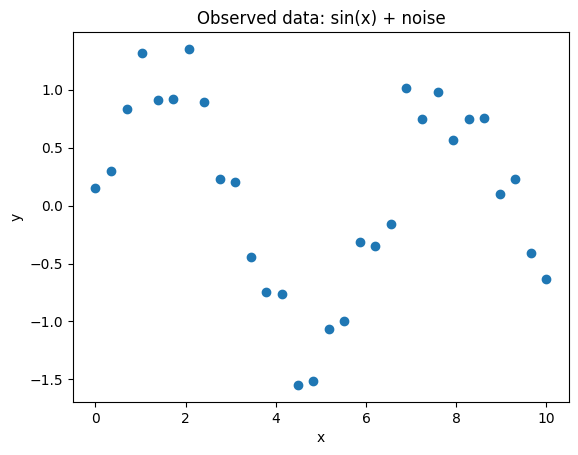

In [3]:
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Observed data: sin(x) + noise")
plt.show()

### Polynomial Regression Model

We fit models of the form:

$\hat{f}(x) = \sum_{j=0}^{d} \beta_j x^j$


where the polynomial degree 𝑑 controls model complexity.

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


In [5]:
def fit_and_plot(degree, x, y):
    model = make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression()
    )
    
    x_plot = np.linspace(0, 10, 200)
    model.fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x_plot.reshape(-1, 1))
    
    plt.scatter(x, y)
    plt.plot(x_plot, y_pred)
    plt.title(f"Polynomial Degree = {degree}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


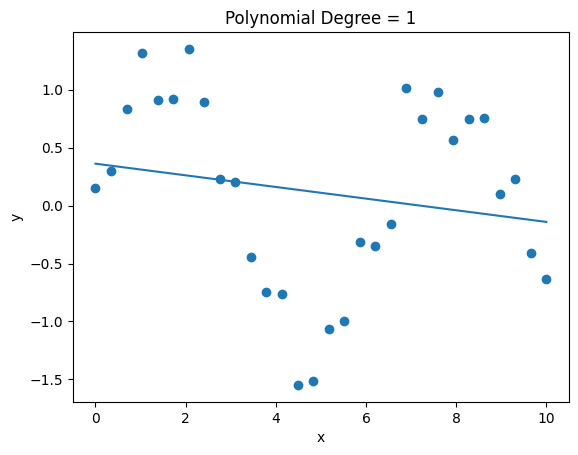

In [11]:
# High Bias — Underfitting (Degree = 1)
fit_and_plot(1, x, y)

### Observation

The linear model is too restrictive: 

$\mathbb{E}[\hat{f}(x)] \neq f(x)$

This results in high bias and low variance, leading to systematic underfitting.

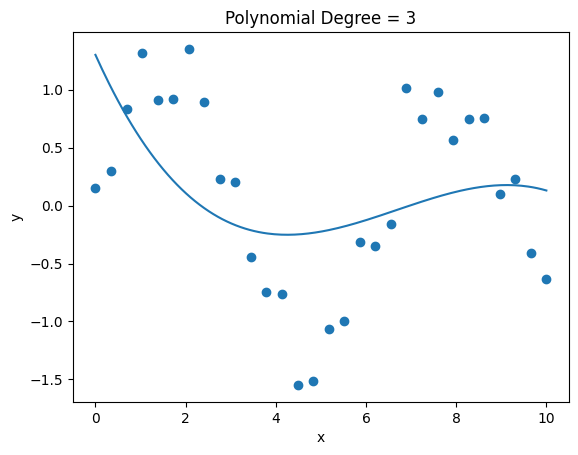

In [10]:
# Bias–Variance Tradeoff (Degree = 3)
fit_and_plot(3, x, y)

### Observation
The model captures the dominant nonlinear structure of the data while remaining stable with respect to sampling variability.

This regime approximately minimizes the expected generalization error.

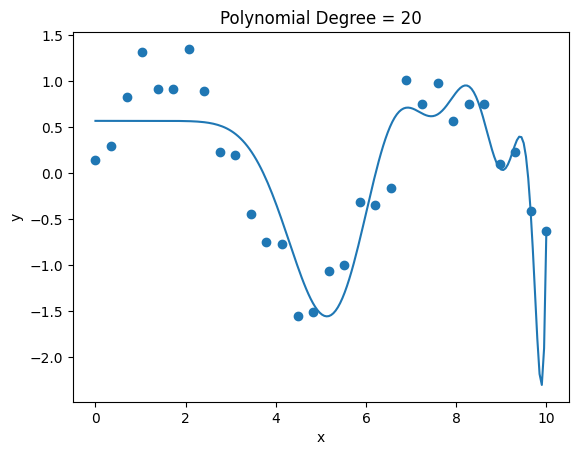

In [9]:
# High Variance — Overfitting (Degree = 20)
fit_and_plot(20, x, y)

### Observation
The model exhibits strong oscillations and high sensitivity to individual observations.
Small perturbations in the data lead to large changes in the fitted function.

### Conclusion 

Increasing model complexity reduces bias but increases variance.
The objective of statistical learning is to select a model complexity that minimizes generalization error, not training error.